<a href="https://colab.research.google.com/github/osum97/python_create_app_1/blob/master/%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실습-정답] Python을 활용한 AI 모델링 - 머신러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 머신러닝에 대해 실습해 보겠습니다.
+ 머신러닝 모델에는 아래와 같이 모델들이 있습니다.
 + 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 + 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM
+ 솔직히, 머신러닝이 딥러닝보다 코딩하기 쉽습니다. 4줄 템플릿에 맞쳐 코딩하면 되기 때문입니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 머신러닝 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - 단일 분류예측 모델 : LogisticRegression, KNN, DecisionTree
 - 앙상블(Ensemble) 모델 : RandomForest, XGBoost, LGBM
2. 재현율 성능이 너무 안나온다. 어떻게 해결할수 있을까?


#  
# 1. 머신러닝 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리,
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가


## ① 라이브러리 임포트

##### 필요 라이브러리 임포트

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## ② 데이터 로드

#### data_v1_save.csv 파일 읽어오기

In [ ]:
# 앞쪽 전처리에서 저장한 cust_data.csv 파일 읽기
df = pd.read_csv('data_v1_save.csv')

## ③ 데이터 분석

In [ ]:
# 17컬럼, 7,027 라인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028 entries, 0 to 7027
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7028 non-null   object 
 1   Partner           7028 non-null   object 
 2   Dependents        7028 non-null   object 
 3   tenure            7028 non-null   int64  
 4   MultipleLines     7028 non-null   object 
 5   InternetService   7028 non-null   object 
 6   OnlineSecurity    7028 non-null   object 
 7   OnlineBackup      7028 non-null   object 
 8   TechSupport       7028 non-null   object 
 9   StreamingTV       7028 non-null   object 
 10  StreamingMovies   7028 non-null   object 
 11  Contract          7028 non-null   object 
 12  PaperlessBilling  7028 non-null   object 
 13  PaymentMethod     7028 non-null   object 
 14  MonthlyCharges    7028 non-null   float64
 15  TotalCharges      7028 non-null   float64
 16  Churn             7028 non-null   int64  


In [ ]:
df.tail()

,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7023,Female,No,No,4,No,Fiber optic,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),82.85,319.60,0
7024,Male,Yes,Yes,25,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.50,630.60,0
7025,Male,Yes,No,3,No,DSL,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.80,154.55,0
7026,Male,Yes,Yes,4,No,DSL,No,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),61.45,229.55,1
7027,Female,No,No,6,No,DSL,No,No,Yes,No,No,Month-to-month,Yes,Bank transfer (automatic),50.80,288.05,1


<Axes: xlabel='Churn'>

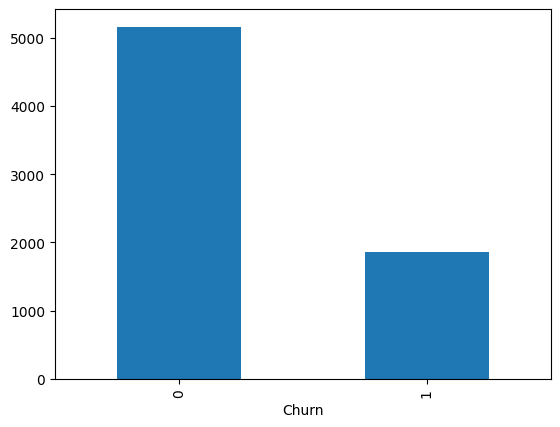

In [ ]:
# Churn 레이블 불균형
df['Churn'].value_counts().plot(kind='bar')

## ④ 데이터 전처리

+ 모든 데이터값들은 숫자형으로 되어야 한다. 즉, Ojbect 타입을 모든 숫자형 변경 필요
+ 순서없는 범주형 데이터를 숫자형을 변환시 LabelEncoder 활용 가능
+ Object 컬럼에 대해 Pandas get_dummies 함수 활용하여 One-Hot-Encoding

> **LabelEncoder(라벨인코딩)**

In [ ]:
# gender 컬럼 내용 앞 5개 보기
df['gender'].head()

0    Female
1      Male
2      Male
3      Male
4      Male
Name: gender, dtype: object

In [ ]:
# LabelEncoder 활용하여 Female -> 0, Male -> 1 (알파벳 순으로) 변경하기
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['gender'])
df['gender'] = le.transform(df['gender'])

In [ ]:
# gender 컬럼 내용 앞 5개 보기
df['gender'].head()

0    0
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

> **Pandas get_dummies (원핫인코딩)**

In [ ]:
# MultipleLines 컬럼 내용 보기
df[['MultipleLines']].head()

,MultipleLines
0,Yes
1,Yes
2,Yes
3,No
4,No


In [ ]:
# MultipleLines 컬럼에 대한 분포 확인 : 3가지 되어 있음 확인
df['MultipleLines'].value_counts()

MultipleLines
No                  3381
Yes                 2966
No phone service     681
Name: count, dtype: int64

In [ ]:
# MultipleLines 컬럼의 값들이 문자열로 되어 있어 숫자로 변환해야 함. 컴퓨터가 이해할수 있도록
# Object 컬럼의 데이터를 원-핫-인코딩해서 숫자로 변경해 주는 함수 : Pandas get_dummies()

pd.get_dummies(data=df, columns=['MultipleLines'])

,gender,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes
0,0,Yes,Yes,69,Fiber optic,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic),105.10,7234.80,0,False,False,True
1,1,No,No,3,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.95,228.40,1,False,False,True
2,1,No,No,67,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check,75.70,5060.85,0,False,False,True
3,1,Yes,No,16,DSL,Yes,Yes,No,No,No,Month-to-month,Yes,Bank transfer (automatic),54.55,825.10,0,True,False,False
4,1,Yes,No,43,DSL,No,No,No,Yes,No,One year,Yes,Mailed check,56.35,2391.15,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,0,No,No,4,Fiber optic,No,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),82.85,319.60,0,True,False,False
7024,1,Yes,Yes,25,No,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.50,630.60,0,False,False,True
7025,1,Yes,No,3,DSL,No,No,Yes,No,No,Month-to-month,Yes,Mailed check,55.80,154.55,0,True,False,False
7026,1,Yes,Yes,4,DSL,No,No,Yes,No,Yes,Month-to-month,No,Credit card (automatic),61.45,229.55,1,True,False,False


In [ ]:
# Object 컬럼 확인
df.select_dtypes('object').head(3)

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,One year,Yes,Credit card (automatic)
1,No,No,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Electronic check
2,No,No,Yes,Fiber optic,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [ ]:
# Object 컬럼명 수집

cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype=object)

##### <font color=blue> **[문제] Object 컬럼에 대해 One-Hot-Encoding 수행하고 그 결과를 df1 변수에 저장하세요.** </font>

In [ ]:
# Pandas get_dummies() 함수 이용
# 원-핫-인코딩 결과를 df1 저장


df1 = pd.get_dummies(data=df, columns=cal_cols)

In [ ]:
# 모든 컬럼 데이터가 숫자되어 있음을 확인
# 40컬럼, 7,027 라인

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7028 entries, 0 to 7027
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7028 non-null   int64  
 1   tenure                                   7028 non-null   int64  
 2   MonthlyCharges                           7028 non-null   float64
 3   TotalCharges                             7028 non-null   float64
 4   Churn                                    7028 non-null   int64  
 5   Partner_No                               7028 non-null   bool   
 6   Partner_Yes                              7028 non-null   bool   
 7   Dependents_No                            7028 non-null   bool   
 8   Dependents_Yes                           7028 non-null   bool   
 9   MultipleLines_No                         7028 non-null   bool   
 10  MultipleLines_No phone service           7028 no

In [ ]:
df1.head(3)

,gender,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,69,105.10,7234.80,0,False,True,False,True,False,...,False,False,True,False,False,True,False,True,False,False
1,1,3,76.95,228.40,1,True,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,1,67,75.70,5060.85,0,True,False,True,False,False,...,False,True,False,False,False,True,False,False,False,True


## ⑤ Train, Test  데이터셋 분할

#### 입력(X)과 레이블(y) 나누기

##### <font color=blue> **[문제] df1 DataFrame에서 'Churn' 컬럼을 제외한 나머지 정보를 X에 저장하세요.** </font>

In [ ]:
# DataFrame drop 함수 활용
# df1 데이터프레임에서 'Churn' 컬럼 삭제



X = df1.drop('Churn', axis=1)

##### <font color=blue> **[문제] df DataFrame에서 'Churn' 컬럼을 y로 저장하세요.** </font>

In [ ]:
# DataFrame 'Churn' 컬럼 사용하여 y에 저장



y = df1['Churn']

In [ ]:
X.shape, y.shape

((7028, 38), (7028,))

#### **PCA (Principle Component Analysis) : 주성분 분석**

- PCA는 데이터의 상관관계를 이용하고 최대한 특징을 유지하면서 차원을 줄이는 분석 기법이다.
- 핵심 원리는 데이터의 분산을 최대화하는 주성분을 찾는 것이다.

##### <font color=blue> **[문제] X 데이터에 대해 PCA 분석해서 몇개의 주성분으로 80% 이상 설명할수 있는지 확인하세요.** </font>

In [ ]:
# PCA 임포트 및 PCA 수행
# PCA 정의시 주성분갯수 n_components=38 주어, 38개의 주성분을 만들게 하며
# 몇개의 주성분으로도 X데이터의 분산 80% 이상을 설명할수 있는지 확인해 보자.

from sklearn.decomposition import PCA

pca = PCA(n_components=38)
pca_components = pca.fit_transform( X )

In [ ]:
# PCA의 explained_variance_ratio_ (설명된 분산 비율) 확인
# 첫번째 주성분만으로도 X 데이터의 99% 분산을 설명할수 있다!! (타겟변수가 심각한 불균형인지 확인 필요)

pca.explained_variance_ratio_

array([9.99859985e-01, 1.22231226e-04, 1.67156921e-05, 1.80066971e-07,
       1.21533353e-07, 9.84273735e-08, 7.93099298e-08, 6.84603163e-08,
       6.44556139e-08, 5.86494138e-08, 5.02426430e-08, 4.86659253e-08,
       4.55306232e-08, 4.45002354e-08, 4.29402692e-08, 4.27224462e-08,
       4.13658004e-08, 3.51385065e-08, 2.55586308e-08, 1.93522876e-08,
       7.88689911e-10, 6.95742279e-33, 6.95742279e-33, 6.95742279e-33,
       6.95742279e-33, 6.95742279e-33, 6.95742279e-33, 6.95742279e-33,
       6.95742279e-33, 6.95742279e-33, 6.95742279e-33, 6.95742279e-33,
       6.95742279e-33, 6.95742279e-33, 6.95742279e-33, 6.95742279e-33,
       6.95742279e-33, 6.95742221e-33])

#### Train , Test dataset 나누기

In [ ]:
from sklearn.model_selection import train_test_split

##### <font color=blue> **[문제] Train dataset, Test dataset 나누세요.** </font>

In [ ]:
# Train dataset, Test dataset 나누기 : train_test_split 함수 사용
# 입력 : X, y
# Train : Test 비율 = 7: 3  --> test_size=0.3
# y Class 비율에 맞게 나누기 : stratify=y
# 여러번 수행해도 같은 결과 나오게 고정하기 : random_state=42
# 결과 : X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
X_train.shape

(4919, 38)

In [ ]:
y_train.shape

(4919,)

## ⑥ 데이터 정규화/스케일링(Normalizing/Scaling)

In [ ]:
# 숫자 분포 이루어진 컬럼 확인
df1.tail()

,gender,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
7023,0,4,82.85,319.60,0,True,False,True,False,True,...,True,True,False,False,False,True,False,True,False,False
7024,1,25,25.50,630.60,0,False,True,False,True,False,...,False,False,False,True,True,False,False,True,False,False
7025,1,3,55.80,154.55,0,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
7026,1,4,61.45,229.55,1,False,True,False,True,True,...,True,True,False,False,True,False,False,True,False,False
7027,0,6,50.80,288.05,1,True,False,True,False,True,...,False,True,False,False,False,True,True,False,False,False


In [ ]:
from sklearn.preprocessing import MinMaxScaler

##### <font color=blue> **[문제] MinMaxScaler 함수를 'scaler'로 정의 하세요.** </font>

In [ ]:
# 사이키런의 MinMaxScaler() 함수 활용
# 정의할 결과를 'scaler'로 매핑



scaler = MinMaxScaler()

In [ ]:
# X_train과 X_test에 대해 MinMaxScaler 적용하기
# X_train에 대해서는 fit_transform 해주고, X_test에 대해서는 transform 해 주자

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# 스케일 적용된 X_train, y_train 데이터 앞 2개만 보자
X_train[:2], y_train[:2]

(array([[0.        , 1.        , 0.74029851, 0.77636654, 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         1.        , 1.        , 0.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ,
         0.        , 0.        , 1.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 1.        , 1.        , 0.        , 1.        ,
         0.        , 0.        , 0.        ],
        [1.        , 1.        , 0.90845771, 0.91331746, 0.        ,
         1.        , 1.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 1.        , 0.        , 0.        ,
         0.        , 1.        , 0.        , 0.        , 1.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 1.        , 0.        , 1.        , 

## ⑦ 모델 개발

#### (참고) 모델별 바차트 그려주고 성능 확인을 위한 함수

In [ ]:
# 모델별로 Recall 점수 저장
# 모델 Recall 점수 순서대로 바차트를 그려 모델별로 성능 확인 가능

from sklearn.metrics import accuracy_score

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

# 모델명, 예측값, 실제값을 주면 위의 plot_predictions 함수 호출하여 Scatter 그래프 그리며
# 모델별 MSE값을 Bar chart로 그려줌
def recall_eval(name_, pred, actual):
    global predictions
    global colors

    plt.figure(figsize=(12, 9))

    #acc = accuracy_score(actual, pred)
    acc = recall_score(actual, pred)
    my_predictions[name_] = acc * 100

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'recall'])
    print(df)

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['recall'])

    for i, v in enumerate(df['recall']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('recall', fontsize=18)
    plt.xlim(0, 100)

    plt.show()

###  
### 1) 로지스틱 회귀 (LogisticRegression, 분류)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

##### <font color=blue> **[문제] LogisticRegression 모델 정의하고 학습시키세요.** </font>

In [ ]:
# LogisticRegression 함수 사용 및 정의 : lg 저장
# 정의된 LogisticRegression 학습 fit() : 입력값으로 X_train, y_train 준다.


lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# 분류기 성능 평가(score)
lg.score(X_test, y_test)

0.8079658605974396

- 분류기 성능 평가 지표

In [ ]:
lg_pred = lg.predict(X_test)

In [ ]:
# 오차행렬
# TN  FP
# FN  TP

confusion_matrix(y_test, lg_pred)

array([[1403,  146],
       [ 259,  301]])

In [ ]:
# 정확도
accuracy_score(y_test, lg_pred)

0.8079658605974396

In [ ]:
# 정밀도
precision_score(y_test, lg_pred)

0.6733780760626398

In [ ]:
# 재현율 : 낮다.
recall_score(y_test, lg_pred)

0.5375

In [ ]:
# 정밀도 + 재현율
f1_score(y_test, lg_pred)

0.5978152929493544

In [ ]:
print(classification_report(y_test, lg_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.67      0.54      0.60       560

    accuracy                           0.81      2109
   macro avg       0.76      0.72      0.74      2109
weighted avg       0.80      0.81      0.80      2109



                model  recall
0  LogisticRegression   53.75


<Figure size 1200x900 with 0 Axes>

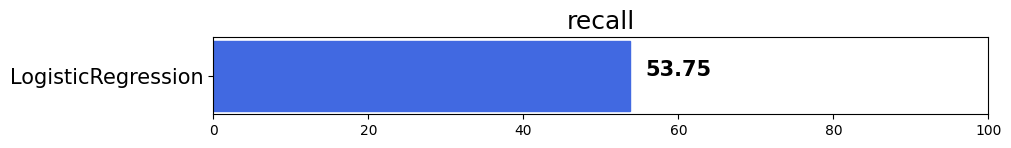

In [ ]:
recall_eval('LogisticRegression', lg_pred, y_test)

###   
### 2) KNN (K-Nearest Neighbor)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_pred = knn.predict(X_test)

                model     recall
0  LogisticRegression  53.750000
1  K-Nearest Neighbor  49.642857


<Figure size 1200x900 with 0 Axes>

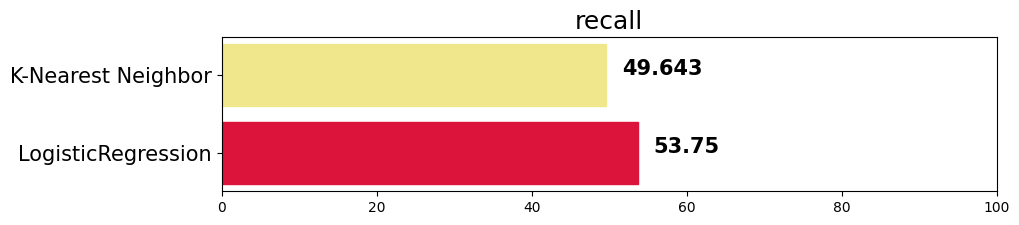

In [ ]:
recall_eval('K-Nearest Neighbor', knn_pred, y_test)

###  
### 3) 결정트리(DecisionTree)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

##### <font color=blue> **[문제] 학습된 DecisionTreeClassifier 모델로 예측해 보기** </font>

In [ ]:
# DecisionTreeClassifier 학습 모델 : dt
# DecisionTreeClassifier 모델의 predict() 활용 : 입력값으로 X_test
# 결과 : dt_pred 저장



dt_pred = dt.predict(X_test)

                model     recall
0  LogisticRegression  53.750000
1        DecisionTree  51.428571
2  K-Nearest Neighbor  49.642857


<Figure size 1200x900 with 0 Axes>

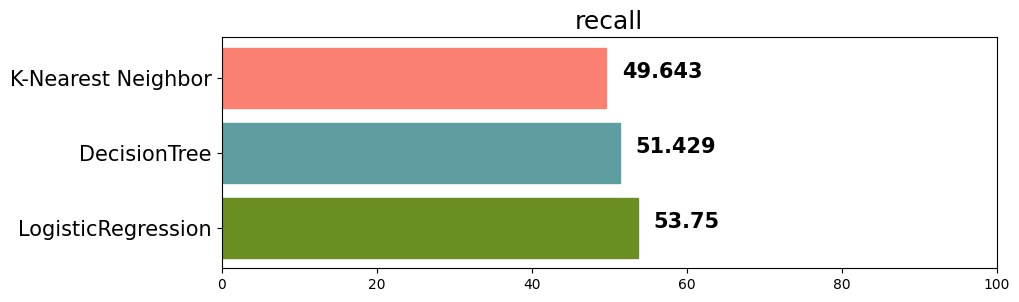

In [ ]:
recall_eval('DecisionTree', dt_pred, y_test)

###  
### **앙상블 기법의 종류**
- 배깅 (Bagging): 여러개의 DecisionTree 활용하고 샘플 중복 생성을 통해 결과 도출. RandomForest
- 부스팅 (Boosting): 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식. XGBoost, LGBM

![앙상블](https://teddylee777.github.io/images/2019-12-18/image-20191217144823555.png)

###  
### 4) 랜덤포레스트(RandomForest)
+ Bagging 대표적인 모델로써, 훈련셋트를 무작위로 각기 다른 서브셋으로 데이터셋을 만들고
+ 여러개의 DecisonTree로 학습하고 다수결로 결정하는 모델

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
- n_estimators: 앙상블하는 트리의 갯수
- max_features: 최대로 사용할 feature의 갯수. 과대적합 방지용
- min_samples_split: 트리가 분할할 때 최소 샘플의 갯수. default=2. 과대적합 방지용

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=3, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [ ]:
rfc_pred = rfc.predict(X_test)

                   model     recall
0     LogisticRegression  53.750000
1           DecisionTree  51.428571
2     K-Nearest Neighbor  49.642857
3  RandomForest Ensemble  47.500000


<Figure size 1200x900 with 0 Axes>

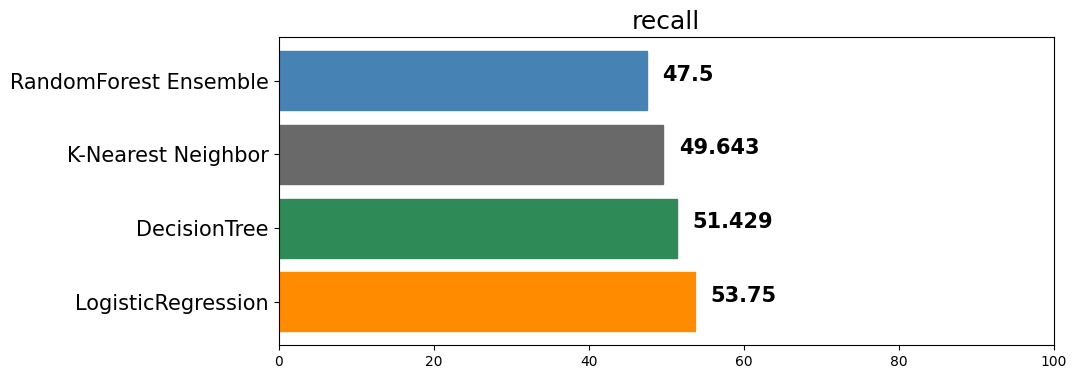

In [ ]:
recall_eval('RandomForest Ensemble', rfc_pred, y_test)

**변수중요도(Feature_importances_)**

In [ ]:
# 램덤포레스트 모델의 38개의 Feature에 대한 중요도(feature_importances_) 보기
rfc.feature_importances_

array([0.02934321, 0.17126374, 0.15817206, 0.19070794, 0.01538114,
       0.02094945, 0.01372716, 0.00741258, 0.01341626, 0.00377826,
       0.01469994, 0.01864873, 0.03199692, 0.        , 0.01490101,
       0.        , 0.01332928, 0.00979736, 0.00453201, 0.0170975 ,
       0.01534862, 0.00151439, 0.01096344, 0.01459885, 0.01713365,
       0.01188501, 0.01294194, 0.01573211, 0.01353451, 0.0233576 ,
       0.01231055, 0.00658289, 0.01574674, 0.02042866, 0.01181155,
       0.01575907, 0.01851234, 0.01268354])

In [ ]:
# 램덤포레스트 모델의 변수중요도를 변수별로 중요도를 상위 7개 출력
# Series 함수 이용 : data=rfc.feature_importances_ , index=X.columns
# sort_values 함수 활용하여 오름차순으로 정렬
# 상위 7개만 보기

pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False).head(7)

TotalCharges                   0.190708
tenure                         0.171264
MonthlyCharges                 0.158172
InternetService_Fiber optic    0.031997
gender                         0.029343
Contract_Month-to-month        0.023358
Partner_Yes                    0.020949
dtype: float64

<Axes: >

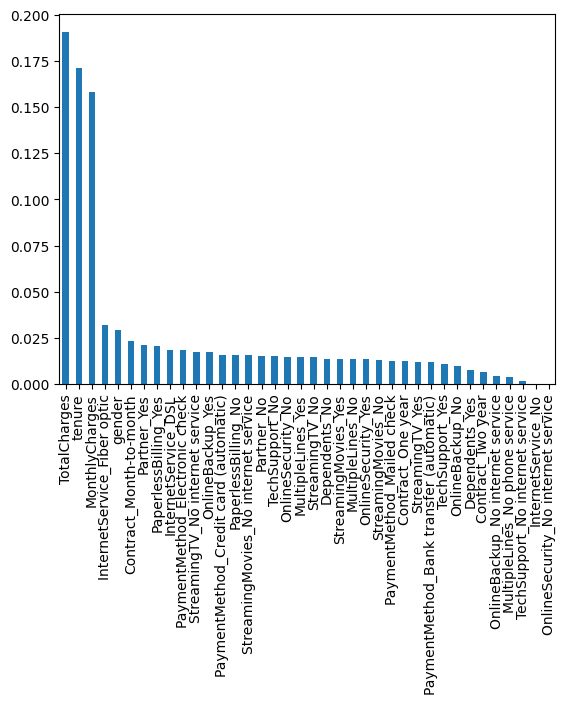

In [ ]:
# 램덤포레스트 모델의 변수중요도를 변수별로 중요도를 바챠트 출력
# Series 함수 이용 : data=rfc.feature_importances_ , index=X.columns
# sort_values 함수 활용하여 오름차순으로 정렬
# 바챠트 그리기

pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')

###  
### 5) XGBoost
+ 여러개의 DecisionTree를 결합하여 Strong Learner 만드는 Boosting 앙상블 기법
+ Kaggle 대회에서 자주 사용하는 모델이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- GBM보다는 빠르고 성능도 향상되었습니다.
- 여전히 학습시간이 매우 느리다

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3.
- subsample: 샘플 사용 비율. 과대적합 방지용. default=1.0
- max_features: 최대로 사용할 feature의 비율. 과대적합 방지용. default=1.0

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier, plot_importance

In [ ]:
xgb = XGBClassifier(n_estimators=3, random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=3, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_pred = xgb.predict(X_test)

                   model     recall
0     LogisticRegression  53.750000
1           DecisionTree  51.428571
2     K-Nearest Neighbor  49.642857
3  RandomForest Ensemble  47.500000
4                XGBoost  35.357143


<Figure size 1200x900 with 0 Axes>

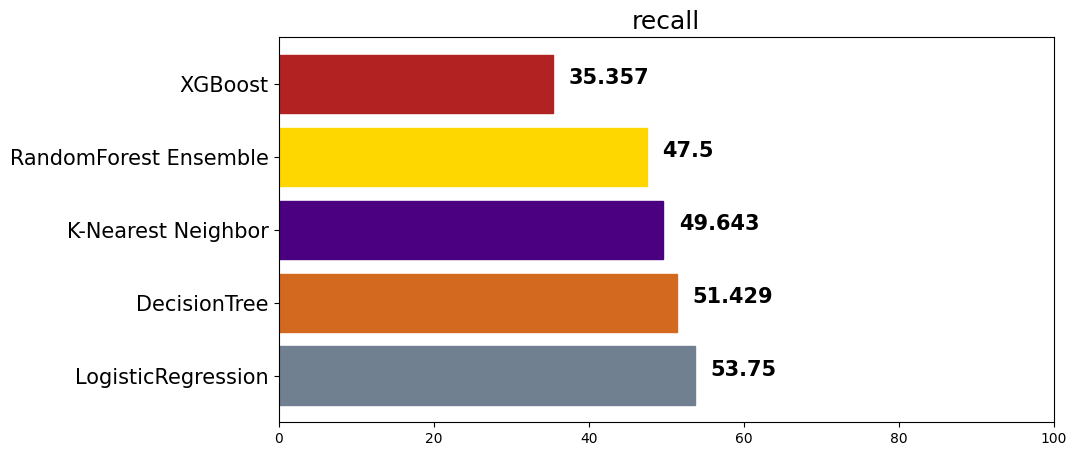

In [ ]:
recall_eval('XGBoost', xgb_pred, y_test)

**변수중요도(Feature_importances_)**

In [ ]:
# XGB 모델의 38개의 Feature에 대한 중요도(feature_importances_) 보기
xgb.feature_importances_

array([0.0024292 , 0.02485147, 0.0079076 , 0.00530914, 0.00128671,
       0.        , 0.00690611, 0.        , 0.01021896, 0.02797195,
       0.00738976, 0.        , 0.14750683, 0.        , 0.0124954 ,
       0.        , 0.        , 0.00969055, 0.        , 0.00082613,
       0.03435532, 0.        , 0.        , 0.00435469, 0.        ,
       0.        , 0.00637595, 0.        , 0.02393946, 0.622349  ,
       0.02223588, 0.        , 0.00766868, 0.        , 0.        ,
       0.00085007, 0.00785909, 0.00522195], dtype=float32)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

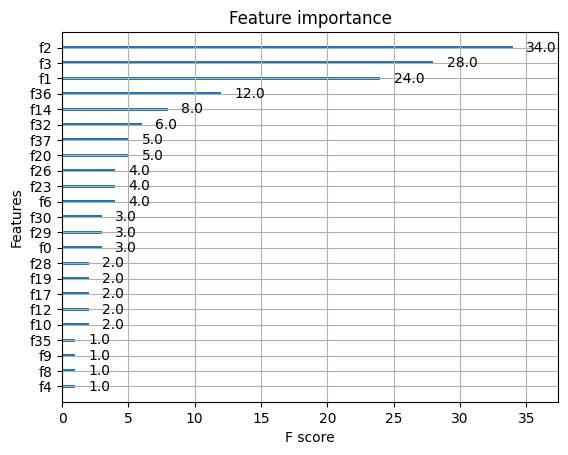

In [ ]:
# XGB 모델에서 제공하는 변수 중요도 그래프 그리기 : plot_importance
# f1~f3 (두번째 퓨쳐 ~ 네번째퓨쳐)가 중요한 퓨쳐임을 나타냄.
# X.columns > ['gender', 'tenure', 'MonthlyCharges', 'TotalCharges', ....]

plot_importance(xgb)

###  
### 6) Light GBM
+ XGBoost와 함께 주목받는 DecisionTree 알고리즘 기반의 Boosting 앙상블 기법
+ XGBoost에 비해 학습시간이 짧은 편이다.

**주요 특징**
- scikit-learn 패키지가 아닙니다.
- 성능이 우수함
- 속도도 매우 빠릅니다.

**주요 Hyperparameter**
- random_state: 랜덤 시드 고정 값. 고정해두고 튜닝할 것!
- n_jobs: CPU 사용 갯수
- learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느리다. 적절한 값을 찾아야함. n_estimators와 같이 튜닝. default=0.1
- n_estimators: 부스팅 스테이지 수. (랜덤포레스트 트리의 갯수 설정과 비슷한 개념). default=100
- max_depth: 트리의 깊이. 과대적합 방지용. default=3.
- colsample_bytree: 샘플 사용 비율 (max_features와 비슷한 개념). 과대적합 방지용. default=1.0

In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
lgbm = LGBMClassifier(n_estimators=3, random_state=42)
lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1306, number of negative: 3613
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 653
[LightGBM] [Info] Number of data points in the train set: 4919, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265501 -> initscore=-1.017569
[LightGBM] [Info] Start training from score -1.017569


LGBMClassifier(n_estimators=3, random_state=42)

In [ ]:
lgbm_pred = lgbm.predict(X_test)

                   model     recall
0     LogisticRegression  53.750000
1           DecisionTree  51.428571
2     K-Nearest Neighbor  49.642857
3  RandomForest Ensemble  47.500000
4                XGBoost  35.357143
5                   LGBM   0.000000


<Figure size 1200x900 with 0 Axes>

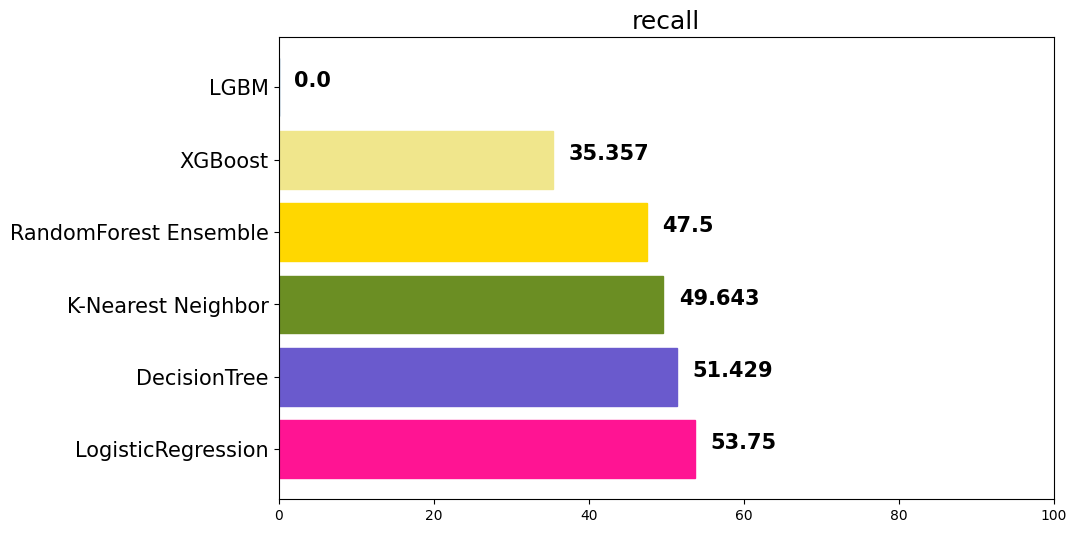

In [ ]:
recall_eval('LGBM', lgbm_pred, y_test)

In [ ]:
# 정확도는 73% 정도 나온다.
lgbm.score(X_test, y_test)

0.7344713134186819

In [ ]:
# 재현율 0으로 나온다.
recall_score(y_test, lgbm_pred)

0.0

**변수중요도(Feature_importances_)**

In [ ]:
# Light GBM 모델의 38개의 Feature에 대한 중요도(feature_importances_) 보기
lgbm.feature_importances_

array([ 2, 23, 17, 10,  0,  0,  1,  0,  2,  2,  0,  2,  2,  0,  3,  0,  0,
        2,  0,  2,  4,  0,  0,  1,  0,  0,  1,  0,  1,  3,  3,  0,  3,  0,
        0,  0,  5,  1], dtype=int32)

In [ ]:
# Light GBM 모델의 변수중요도를 변수별로 중요도를 상위 7개 출력

pd.Series(lgbm.feature_importances_, index=X.columns).sort_values(ascending=False).head(7)

tenure                            23
MonthlyCharges                    17
TotalCharges                      10
PaymentMethod_Electronic check     5
TechSupport_No                     4
PaperlessBilling_No                3
Contract_One year                  3
dtype: int32

<Axes: >

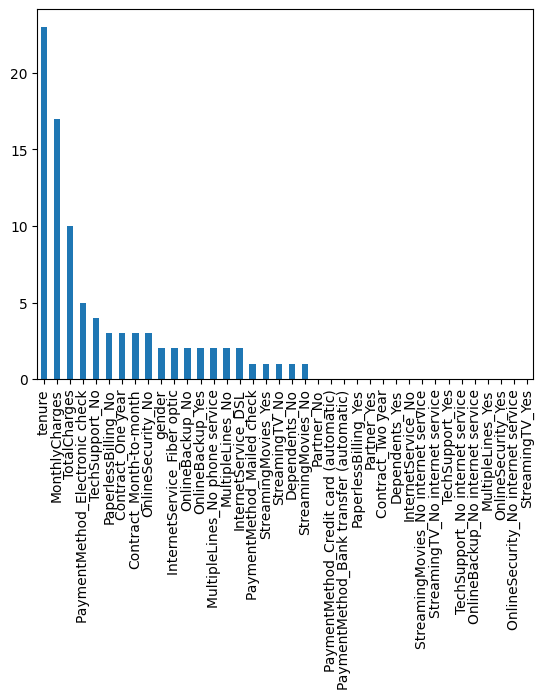

In [ ]:
# Light GBM 모델의 변수중요도를 변수별로 중요도를 바챠트 출력

pd.Series(lgbm.feature_importances_, index=X.columns).sort_values(ascending=False).plot(kind='bar')

###  
### 7) GridSearchCV
+ 입력된 하이퍼 파라미터의 값을 조합해서 각 조합마다
+ 모델 성능을 평가, 비교하면서 최적의 하이퍼 파라미터 값을 찾는 과정
+ 시간이 오래걸린다는 단점이 있으니 알아두세요!

In [ ]:
# GridSearchCV 활용하여 xgb 모델의 최적의 하이퍼 파라미터를 찾습니다.
# 1. 최적의 파라미터를 찾을 학습기 XGB 정의 합니다.
# 2. 선정된 학습기에 대해 성능을 측정하고 싶은 하이퍼파라미터를 리스트를 정의 합니다.
# 3. GridSearchCV 함수는 선정된 학습기에 조합된 하이퍼파라미터를 하나씩 대입해서 학습 및 성능 측정합니다.
# 4. GridSearchCV 함수 수행이 완료 되면, 최적의 하이퍼파라미터을 찾을수 있게 됩니다.

from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42)
param_xgb = {"max_depth": [10, 15],
             "n_estimators": [100,150] }

grid_xgb = GridSearchCV (estimator = xgb, param_grid = param_xgb, )
grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'max_depth': [10, 15], 'n_estimators': [100, 150]})

In [ ]:
print('XGB 최적의 하이퍼파라미터: ', grid_xgb.best_params_)
print('XGB 예측 정확도: {:.4f}'.format(grid_xgb.best_score_))

XGB 최적의 하이퍼파라미터:  {'max_depth': 10, 'n_estimators': 150}
XGB 예측 정확도: 0.7806


In [ ]:
# 최적 파라미터의 학습기로 예측하기
grid_pred = grid_xgb.best_estimator_.predict(X_test)

                   model     recall
0     LogisticRegression  53.750000
1           DecisionTree  51.428571
2               Grid_XGB  50.000000
3     K-Nearest Neighbor  49.642857
4  RandomForest Ensemble  47.500000
5                XGBoost  35.357143
6                   LGBM   0.000000


<Figure size 1200x900 with 0 Axes>

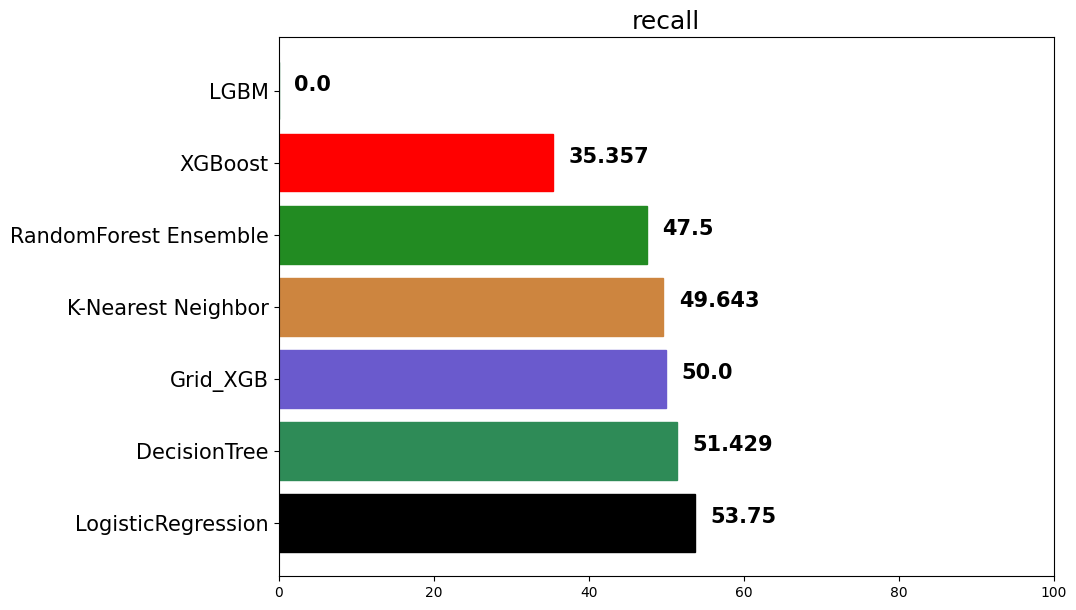

In [ ]:
recall_eval('Grid_XGB', grid_pred, y_test)

##  
# <font color=red>2. 재현율 성능이 너무 안나온다. 어떻게 해결할수 있을까?</font>

<br>

##  
## 배운 내용 정리
1. 머신러닝 모델 프로세스 <br>
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리,
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가
2. 평가 지표 활용 : 모델별 성능 확인을 위한 함수 (가져다 쓰면 된다)
3. 단일 회귀예측 모델 : LogisticRegression, KNN, DecisionTree
4. 앙상블 (Ensemble) : RandomForest, XGBoost, LGBM
5. 재현율 성능이 너무 안나온다. 어떻게 해결할수 있을까?

<p>
<p>
<p>
<p>


<p>
<p>
<p>

<p>
<p>
<p>

# [실습-정답] Python을 활용한 AI 모델링 - 딥러닝 파트
+ 이번시간에는 Python을 활용한 AI 모델링에서 딥러닝에 대해 실습해 보겠습니다.
+ 여기서는 딥러닝 모델 DNN에 대해 코딩하여 모델 구축해 보겠습니다.
+ 한가지 당부 드리고 싶은 말은 "백문이불여일타" 입니다.
+ 이론보다 실습이 더 많은 시간과 노력이 투자 되어야 합니다.

## 학습목차
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 - 데이터 가져오기
 - 데이터 전처리
 - Train, Test 데이터셋 분할
 - 데이터 정규화
 - DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?

#  
# 1. 딥러닝 심층신경망(DNN) 모델 프로세스
① 라이브러리 임포트(import)  
② 데이터 가져오기(Loading the data)  
③ 탐색적 데이터 분석(Exploratory Data Analysis)  
④ 데이터 전처리(Data PreProcessing) : 데이터타입 변환, Null 데이터 처리, 누락데이터 처리,
더미특성 생성, 특성 추출 (feature engineering) 등  
⑤ Train, Test  데이터셋 분할  
⑥ 데이터 정규화(Normalizing the Data)  
⑦ 모델 개발(Creating the Model)  
⑧ 모델 성능 평가

### <font color='red'>1 ~ 6번까지 완료한 상태</font>

## ⑦ 딥러닝 심층신경망(DNN) 모델 구현

####  
### 라이브러리 임포트

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(100)

####  
### 하이퍼파라미터 설정 : batch_size, epochs

In [ ]:
batch_size = 16
epochs = 20

####  
### 모델 입력(features) 갯수 확인

In [ ]:
X_train.shape

(4919, 38)

####  
### 모델 출력(label) 갯수 확인

In [ ]:
y_train.shape

(4919,)

####  
### A. 이진분류 DNN모델 구성

![hidden Layer](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer1.PNG)
+ [출처] https://subscription.packtpub.com/book/data/9781788995207/1/ch01lvl1sec03/deep-learning-intuition

##### <font color=blue> **[문제] 요구사항대로 Sequential 모델을 만들어 보세요.** </font>

In [ ]:
# Sequential() 모델 정의 하고 model로 저장
# input layer는 input_shape=() 옵션을 사용한다.
# 38개 input layer
# unit 4개 hidden layer
# unit 3개 hidden layer
# 1개 output layser : 이진분류


model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(38,)))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

####  
### 모델 확인

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 156       
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 175 (700.00 Byte)
Trainable params: 175 (700.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  
### 모델 구성 -  과적합 방지

![dropout](https://github.com/gzone2000/TEMP_TEST/raw/master/dropout.PNG)
+ [출처] https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5

In [ ]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(38,)))
model.add(Dropout(0.3))
model.add(Dense(3, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

####  
### 과적합 방지 모델 확인

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 156       
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dropout_1 (Dropout)         (None, 3)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 175 (700.00 Byte)
Trainable params: 175 (700.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  
### 모델 컴파일 – 이진 분류 모델

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델 (Y값을 One-Hot-Encoding 한경우) <br>
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 다중 분류 모델  (Y값을 One-Hot-Encoding 하지 않은 경우) <br>
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- 모델 컴파일 – 예측 모델
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

####  
### 모델 학습

##### <font color=blue> **[문제] 요구사항대로 DNN 모델을 학습시키세요.** </font>
+ 모델 이름 : model
+ epoch : 10번
+ batch_size : 10번

In [ ]:
# 앞쪽에서 정의된 모델 이름 : model
# Sequential 모델의 fit() 함수 사용
# @인자
### X, y : X_train, y_train
### validation_data=(X_test, y_test)
### epochs 10번
### batch_size 10번


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=10)

Epoch 1/10
492/492 [==============================] - 3s 3ms/step - loss: 0.6597 - accuracy: 0.6831 - val_loss: 0.6077 - val_accuracy: 0.7345
Epoch 2/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5676 - accuracy: 0.7341 - val_loss: 0.5048 - val_accuracy: 0.7345
Epoch 3/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5396 - accuracy: 0.7345 - val_loss: 0.4840 - val_accuracy: 0.7345
Epoch 4/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.7345 - val_loss: 0.4719 - val_accuracy: 0.7345
Epoch 5/10
492/492 [==============================] - 1s 2ms/step - loss: 0.5027 - accuracy: 0.7345 - val_loss: 0.4623 - val_accuracy: 0.7345
Epoch 6/10
492/492 [==============================] - 2s 3ms/step - loss: 0.4996 - accuracy: 0.7345 - val_loss: 0.4589 - val_accuracy: 0.7345
Epoch 7/10
492/492 [==============================] - 2s 4ms/step - loss: 0.4962 - accuracy: 0.7351 - val_loss: 0.4585 - val_accuracy: 0.7345
Epoch 

####  
### B. 다중 분류 DNN 구성
+ 13개 input layer
+ unit 5개 hidden layer
+ dropout
+ unit 4개 hidden layer
+ dropout
+ 2개 output layser : 이진분류

![다중분류](https://github.com/gzone2000/TEMP_TEST/raw/master/hidden_layer2.PNG)
+ [출처] https://www.educba.com/dnn-neural-network/

In [ ]:
# 38개 input layer
# unit 5개 hidden layer
# dropout
# unit 4개 hidden layer
# dropout
# 2개 output layser : 다중분류

model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(38,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

####  
### 모델 확인

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 5)                 195       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_7 (Dense)             (None, 4)                 24        
                                                                 
 dropout_3 (Dropout)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 2)                 10        
                                                                 
Total params: 229 (916.00 Byte)
Trainable params: 229 (916.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


####  
### 모델 컴파일 – 다중 분류 모델

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

####  
### 모델 학습

In [ ]:
history = model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=20,
          batch_size=16)

Epoch 1/20
308/308 [==============================] - 3s 5ms/step - loss: 0.6057 - accuracy: 0.7156 - val_loss: 0.5200 - val_accuracy: 0.7345
Epoch 2/20
308/308 [==============================] - 1s 3ms/step - loss: 0.5328 - accuracy: 0.7337 - val_loss: 0.4802 - val_accuracy: 0.7345
Epoch 3/20
308/308 [==============================] - 1s 3ms/step - loss: 0.5155 - accuracy: 0.7345 - val_loss: 0.4630 - val_accuracy: 0.7345
Epoch 4/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4975 - accuracy: 0.7345 - val_loss: 0.4550 - val_accuracy: 0.7345
Epoch 5/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4919 - accuracy: 0.7345 - val_loss: 0.4506 - val_accuracy: 0.7345
Epoch 6/20
308/308 [==============================] - 1s 2ms/step - loss: 0.4824 - accuracy: 0.7345 - val_loss: 0.4469 - val_accuracy: 0.7345
Epoch 7/20
308/308 [==============================] - 1s 3ms/step - loss: 0.4878 - accuracy: 0.7345 - val_loss: 0.4443 - val_accuracy: 0.7345
Epoch 

####  
### Callback : 조기종료, 모델 저장

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# val_loss 모니터링해서 성능이 5번 지나도록 좋아지지 않으면 조기 종료
early_stop = EarlyStopping(monitor='val_loss', verbose=1, patience=5)

In [ ]:
# val_loss 가장 낮은 값을 가질때마다 모델저장
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', save_best_only=True)

####  
### 모델 학습

In [ ]:
history = model.fit(x=X_train, y=y_train,
          epochs=50 , batch_size=20,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
231/246 [===========================>..] - ETA: 0s - loss: 0.4755 - accuracy: 0.7331
Epoch 1: val_loss improved from inf to 0.43614, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4736 - accuracy: 0.7345 - val_loss: 0.4361 - val_accuracy: 0.7345
Epoch 2/50
 88/246 [=========>....................] - ETA: 0s - loss: 0.4608 - accuracy: 0.7392

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


234/246 [===========================>..] - ETA: 0s - loss: 0.4654 - accuracy: 0.7338
Epoch 2: val_loss improved from 0.43614 to 0.43556, saving model to best_model.h5
246/246 [==============================] - 1s 3ms/step - loss: 0.4662 - accuracy: 0.7345 - val_loss: 0.4356 - val_accuracy: 0.7345
Epoch 3/50
228/246 [==========================>...] - ETA: 0s - loss: 0.4654 - accuracy: 0.7364
Epoch 3: val_loss improved from 0.43556 to 0.43486, saving model to best_model.h5
246/246 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7345 - val_loss: 0.4349 - val_accuracy: 0.7345
Epoch 4/50
226/246 [==========================>...] - ETA: 0s - loss: 0.4681 - accuracy: 0.7662
Epoch 4: val_loss improved from 0.43486 to 0.43435, saving model to best_model.h5
246/246 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7640 - val_loss: 0.4344 - val_accuracy: 0.7345
Epoch 5/50
245/246 [============================>.] - ETA: 0s - loss: 0.4683 - accur

####  
## ⑧ 모델 성능 평가

### 성능 시각화

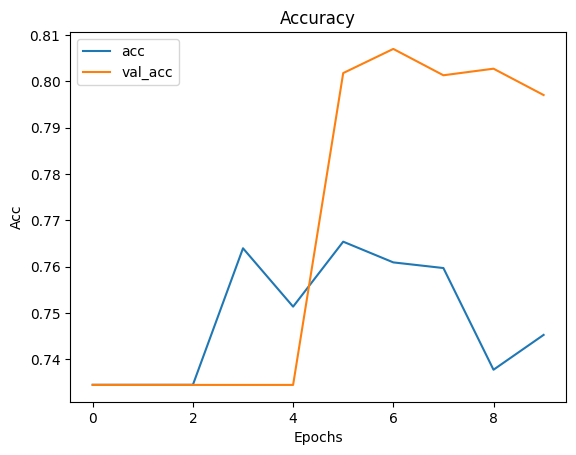

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

### 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
pred = model.predict(X_test)

66/66 [==============================] - 0s 1ms/step


In [ ]:
pred.shape

(2109, 2)

In [ ]:
y_pred = np.argmax(pred, axis=1)

In [ ]:
# 정확도 80%
accuracy_score(y_test, y_pred)

0.7970602181128497

In [ ]:
# 재현율 성능이 좋지 않다
recall_score(y_test, y_pred)

0.3482142857142857

In [ ]:
# accuracy, recall, precision 성능 한번에 보기

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      1549
           1       0.76      0.35      0.48       560

    accuracy                           0.80      2109
   macro avg       0.78      0.65      0.68      2109
weighted avg       0.79      0.80      0.77      2109



#  
# 2. 재현율 성능이 좋지 않다. 어떻게 성능향상 할수 있나?
+ 성능향상 할수 있는 방법은 여러가지 있습니다.
+ DNN 하이퍼 파라미터 수정하면서 성능향상이 되는지 확인
+ 데이터 줄이거나 늘리거나, Feature(컬럼)을 늘리거나 줄이거나 하는 식의 Feature Engineering 방법

####  
## Feature Engineering 통한 성능향상
+ 불균현 Churn 데이터 균형 맞추기 : OverSampling, UnderSampling
+ OverSampling 기법 : SMOTE(Synthetic Minority Over-sampling Technique)
+ 참조사이트 : https://datascienceschool.net/03%20machine%20learning/14.02%20%EB%B9%84%EB%8C%80%EC%B9%AD%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%AC%B8%EC%A0%9C.html

![SMOTE](https://github.com/gzone2000/TEMP_TEST/raw/master/SMOTE.png)

### imbalanced-learn 패키지 설치
+ imbalanced data 문제를 해결하기 위한 다양한 샘플링 방법을 구현한 파이썬 패키지

In [ ]:
!pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


####  
### SMOTE 함수 이용하여 Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# SMOTE 함수 정의 및 Oversampling 수행

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

In [ ]:
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (4919, 38) (4919,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (7226, 38) (7226,)


In [ ]:
# SMOTE 적용 후 레이블 값 분포 : 0과 1 갯수가 동일
pd.Series(y_train_over).value_counts()

Churn
0    3613
1    3613
Name: count, dtype: int64

####  
### 모델 개발(Creating the Model)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(38,)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# 여기서는 val_accuracy 모니터링해서 성능이 좋아지지 않으면 조기 종료 하게 함.
early_stop = EarlyStopping(monitor='val_accuracy', verbose=1, patience=5)

In [ ]:
check_point = ModelCheckpoint('best_model.h5', verbose=1,
                              monitor='val_loss', save_best_only=True)

In [ ]:
history = model.fit(x=X_train_over, y=y_train_over,
          epochs=50 , batch_size=32,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop, check_point])

Epoch 1/50
221/226 [============================>.] - ETA: 0s - loss: 0.6071 - accuracy: 0.6704
Epoch 1: val_loss improved from inf to 0.48089, saving model to best_model.h5
226/226 [==============================] - 6s 11ms/step - loss: 0.6057 - accuracy: 0.6713 - val_loss: 0.4809 - val_accuracy: 0.7515
Epoch 2/50
  1/226 [..............................] - ETA: 3s - loss: 0.5273 - accuracy: 0.6875

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


223/226 [============================>.] - ETA: 0s - loss: 0.5198 - accuracy: 0.7522
Epoch 2: val_loss did not improve from 0.48089
226/226 [==============================] - 2s 9ms/step - loss: 0.5209 - accuracy: 0.7515 - val_loss: 0.4883 - val_accuracy: 0.7349
Epoch 3/50
217/226 [===========================>..] - ETA: 0s - loss: 0.5036 - accuracy: 0.7591
Epoch 3: val_loss improved from 0.48089 to 0.47758, saving model to best_model.h5
226/226 [==============================] - 2s 8ms/step - loss: 0.5016 - accuracy: 0.7603 - val_loss: 0.4776 - val_accuracy: 0.7530
Epoch 4/50
220/226 [============================>.] - ETA: 0s - loss: 0.4884 - accuracy: 0.7656
Epoch 4: val_loss improved from 0.47758 to 0.47380, saving model to best_model.h5
226/226 [==============================] - 2s 10ms/step - loss: 0.4875 - accuracy: 0.7658 - val_loss: 0.4738 - val_accuracy: 0.7392
Epoch 5/50
226/226 [==============================] - ETA: 0s - loss: 0.4880 - accuracy: 0.7676
Epoch 5: val_loss impr

####  
### 모델 성능 평가

#### 성능 시각화

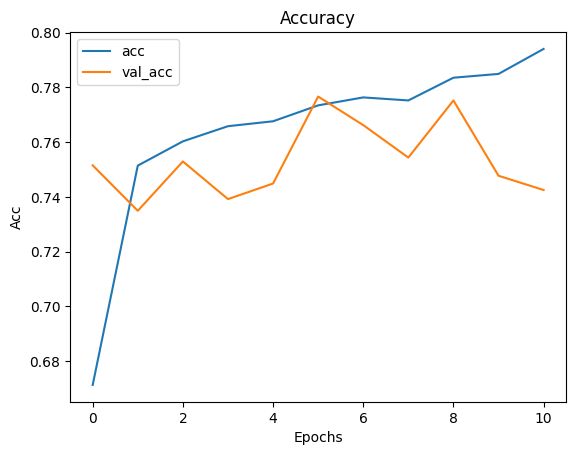

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

#### 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [ ]:
pred = model.predict(X_test)

66/66 [==============================] - 0s 4ms/step


In [ ]:
pred.shape

(2109, 2)

In [ ]:
y_pred = np.argmax(pred, axis=1)

In [ ]:
# 정확도 70~80%
accuracy_score(y_test, y_pred)

0.7425320056899004

In [ ]:
# 재현율 70% 정도로 이전보다 좋아졌다.
recall_score(y_test, y_pred)

0.7642857142857142

In [ ]:
# recall 성능을 올렸지만, 반대급부로 precision 성능은 떨어진다.
# accuracy, recall, precision 어떤것에 집중할지 선택하는것도 필요하다.

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1549
           1       0.51      0.76      0.61       560

    accuracy                           0.74      2109
   macro avg       0.70      0.75      0.71      2109
weighted avg       0.79      0.74      0.76      2109



###  
## 배운 내용 정리
1. 딥러닝 심층신경망(DNN) 모델 프로세스
 + 데이터 가져오기
 + 데이터 전처리
 + Train, Test 데이터셋 분할
 + 데이터 정규화
 + DNN 딥러닝 모델
2. 재현율 성능이 좋지 않다. 어떻게 성능향상 방법은?
 + Feature Engineering : 성능 잘 나올수 있도록 데이터 가공
 + 불균현 데이터 문제 해소 : under-sampling, over-sampling
 + Over-Sampling 기법 : SMOTE